## Gender Classification

In [57]:
#Importing the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#Loading of the dataset

df = pd.read_csv('/content/gender_classification_v7.csv')
df.head(10)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
5,1,13.0,6.8,1,1,1,1,Male
6,1,15.3,6.2,1,1,1,0,Male
7,0,13.0,5.2,0,0,0,0,Female
8,1,11.9,5.4,1,0,1,1,Female
9,1,12.1,5.4,0,0,0,0,Female


### Exploratory Data Analaysis

In [ ]:
#Checking on the shape of the dataframe

df.shape

(5001, 8)

In [ ]:
#Checking on the datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [ ]:
#Checking for duplicates

df.duplicated().sum()

1768

In [ ]:
#Dropping the duplicates

df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [ ]:
#Summary Statistics

df.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,3233.000000,3233.000000,3233.000000,3233.000000,3233.000000,3233.000000,3233.000000
mean,0.822456,13.217198,5.966038,0.536344,0.557686,0.538509,0.545314
std,0.382188,1.115993,0.549789,0.498755,0.496738,0.498592,0.498019
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.300000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.200000,5.900000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,14.100000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


### Visualizations

1. Univariate Visualizations

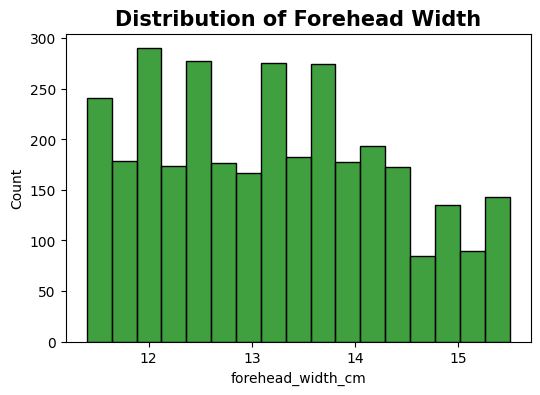

In [ ]:
#Histograms

plt.figure(figsize = (6,4))
sns.histplot(df['forehead_width_cm'],color = 'green', edgecolor = 'black')
plt.title('Distribution of Forehead Width', weight = 'bold', size = 15)
plt.show()
# plt.savefig()

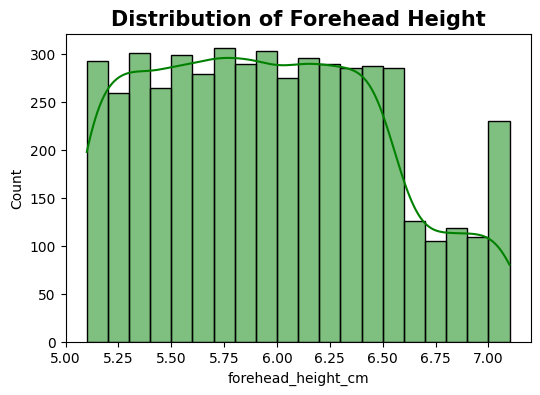

In [ ]:
plt.figure(figsize = (6,4))
sns.histplot(df['forehead_height_cm'],color = 'green', edgecolor = 'black', kde = True)
plt.title('Distribution of Forehead Height', weight = 'bold', size = 15)
plt.show()

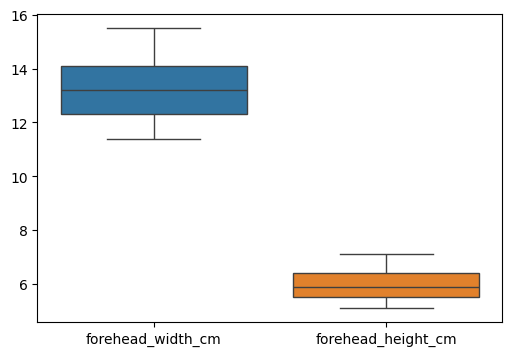

In [ ]:
plt.figure(figsize = (6,4))
sns.boxplot(df[['forehead_width_cm', 'forehead_height_cm']])
plt.show()

The median value of Forehead width is 13.5cm and the median of Forehead height is 6cm.

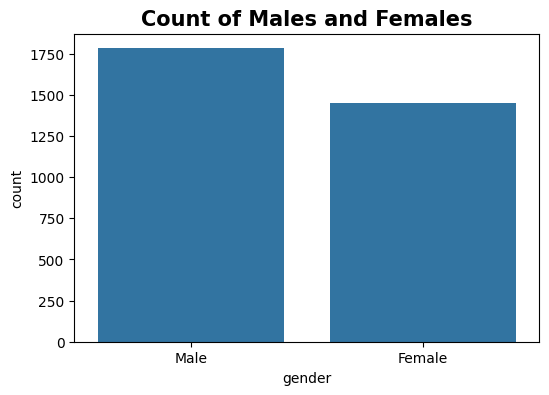

In [ ]:
#Countplot

plt.figure(figsize = (6,4))
sns.countplot(x = df['gender'])
plt.title('Count of Males and Females', weight = 'bold', size = 15)
plt.show()

We have a higher number of males than females at 1750 and around 1500 respectively. This shows that there is a class imbalance.

### Multivariate Visuals

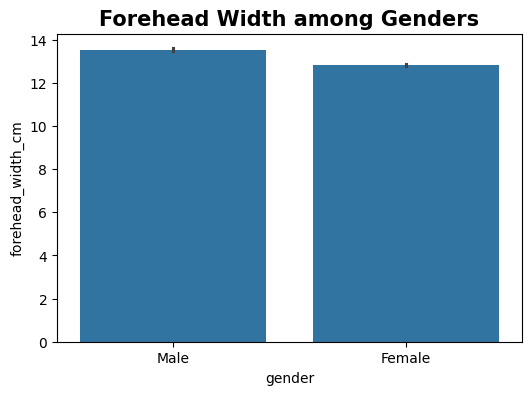

In [ ]:
#Barplot

plt.figure(figsize = (6,4))
sns.barplot(x = df['gender'], y = df['forehead_width_cm'])
plt.title('Forehead Width among Genders', weight = 'bold', size = 15)
plt.show()

The forehead width in both males and females is about the same around 13 cm although men have wider foreheads than females.

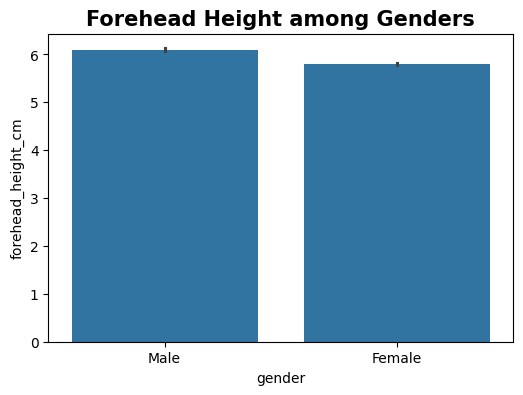

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize = (6,4))
sns.barplot(x = df['gender'], y = df['forehead_height_cm'])
plt.title('Forehead Height among Genders', weight = 'bold', size = 15)
plt.show()
plt.savefig('forehead height')

The forehead height in both males and females is about the same around 6 cm although men have longer foreheads than females.

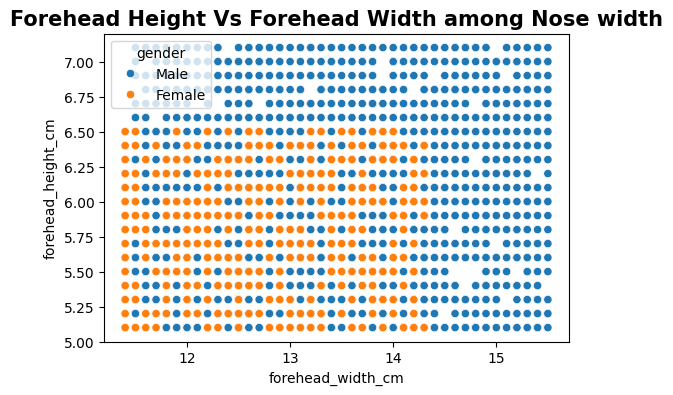

In [ ]:
# Scatter plots

plt.figure(figsize = (6,4))
sns.scatterplot(x = df['forehead_width_cm'], y = df['forehead_height_cm'], hue = df['gender'])
plt.title('Forehead Height Vs Forehead Width among Nose width', weight = 'bold', size = 15)
plt.show()

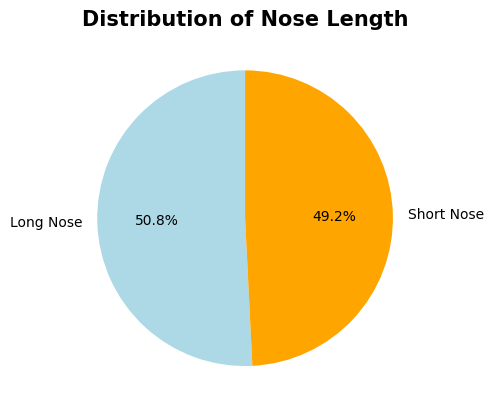

<Figure size 600x400 with 0 Axes>

In [ ]:
#Pie Chart

sizes = df['nose_long'].value_counts()
labels = sizes.index.map({0: 'Short Nose', 1: 'Long Nose'})


fig, ax = plt.subplots()
plt.figure(figsize = (6,4))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'orange'])
ax.set_title("Distribution of Nose Length", weight = 'bold', size = 15)
plt.show()


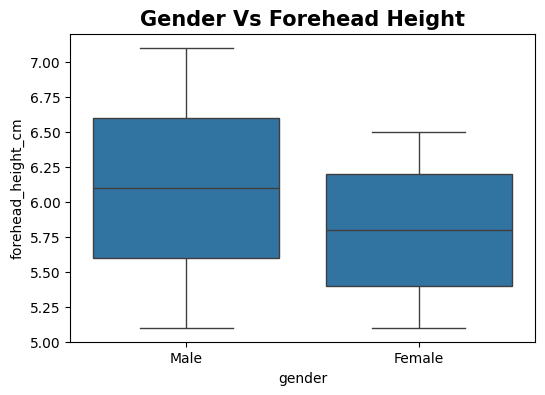

In [ ]:
#Boxplot to compare gender and forehead height

plt.figure(figsize = (6,4))
sns.boxplot(data=df, x='gender', y='forehead_height_cm')
plt.title('Gender Vs Forehead Height', weight = 'bold', size = 15)
plt.show()

Males are seen to have higher forehead height compared to females at arounf 6.1 cm and 5.75 cm respectively.

In [44]:
#Label encoding of the gender column

le = LabelEncoder()

df['gender'] = le.fit_transform(df['gender'])
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0


Male has been encoded to 1 and female to 0

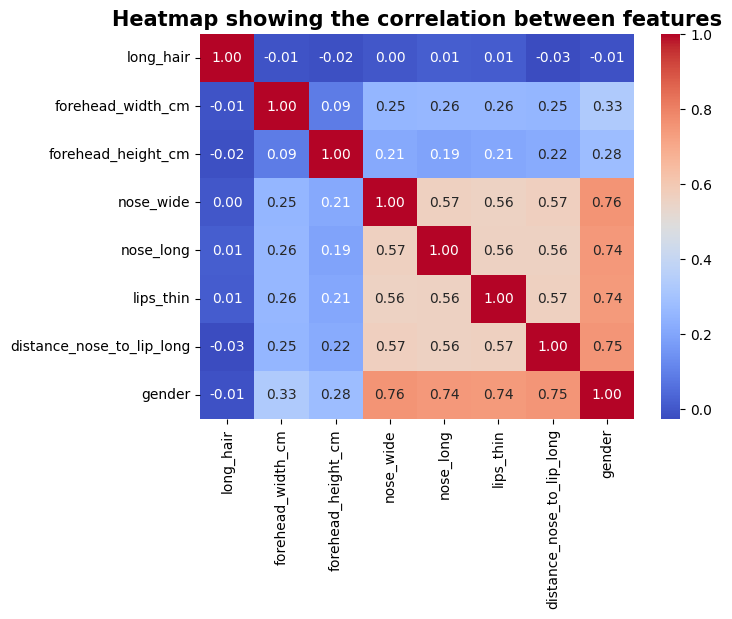

In [47]:
# Correlation heatmap

matrix = df.corr()

plt.figure(figsize = (7,5))
sns.heatmap(matrix, cmap = 'coolwarm', annot = True, fmt = '.2f')
plt.title('Heatmap showing the correlation between features', weight = 'bold', size = 15)
plt.show()

- Long hair has no correlation to gender
- Nose width, nose length, lips thin and distance from nose to lip long have a high correlation to gender.

## Feature Engineering

In [49]:
X = df[['nose_wide', 'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'forehead_width_cm', 'forehead_height_cm']]
y = df['gender']

We have dropped the ;ong hair column because it has no correlation toward our target variable

In [50]:
#Splitting the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 55)

### Model Development

In [55]:
# Logistic Regression

lr = LogisticRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
print('Confusion Matrix\n', cm)

print('')
cr = classification_report(y_pred, y_test)

print('Classification Report\n', cr)

Confusion Matrix
 [[468  10]
 [ 21 502]]

Classification Report
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       478
           1       0.98      0.96      0.97       523

    accuracy                           0.97      1001
   macro avg       0.97      0.97      0.97      1001
weighted avg       0.97      0.97      0.97      1001



**1.  Confusion Matrix**
- 468 correctly predicted and 10 incorrectly predicted class 0  values
- 502 correctly predicted and 21 incorrectly predicted class 1  values

**2. Classification Report**
- precision for class 0 - 96% were correctly predicted
- precision for class 1 - 98% were correctly predicted

- Recall for class 0 - 98% were correctly predicted
- Recall for class 1 - 96% were correctly predicted

In [56]:
#Random Forest classifier model

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
print('Confusion Matrix\n', cm)

print('')
cr = classification_report(y_pred, y_test)

print('Classification Report\n', cr)

Confusion Matrix
 [[474  15]
 [ 15 497]]

Classification Report
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       489
           1       0.97      0.97      0.97       512

    accuracy                           0.97      1001
   macro avg       0.97      0.97      0.97      1001
weighted avg       0.97      0.97      0.97      1001



In [59]:
#Gradient Boost CLassifier

gb = GradientBoostingClassifier()

gb.fit(X_train, y_train)

y_predict = gb.predict(X_test)

cm = confusion_matrix(y_predict, y_test)
print('Confusion Matrix\n', cm)

print('')
cr = classification_report(y_predict, y_test)

print('Classification Report\n', cr)

Confusion Matrix
 [[479  17]
 [ 10 495]]

Classification Report
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       496
           1       0.97      0.98      0.97       505

    accuracy                           0.97      1001
   macro avg       0.97      0.97      0.97      1001
weighted avg       0.97      0.97      0.97      1001



### Feature Importances

In [60]:
importances = rf.feature_importances_
features = X.columns

feature_importances = pd.DataFrame({
    'Features': features,
    'Importance': importances
}).sort_values(by = 'Importance',ascending = False)

feature_importances

,Features,Importance
0,nose_wide,0.247545
3,distance_nose_to_lip_long,0.209808
1,nose_long,0.204925
2,lips_thin,0.190984
4,forehead_width_cm,0.087857
5,forehead_height_cm,0.058882


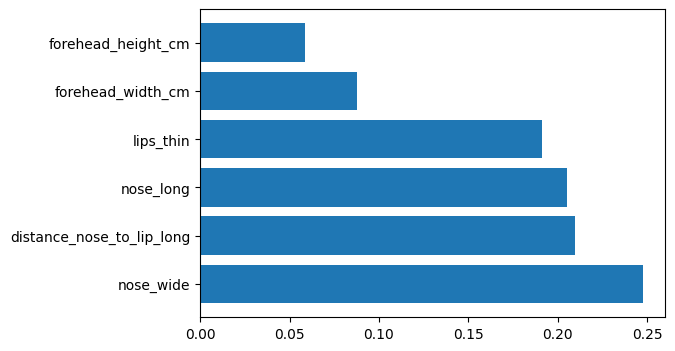

In [64]:
#Plotting the feature importances
feature_importances_desc = feature_importances.sort_values(by = 'Importance', ascending = False)

y = feature_importances_desc['Importance']
x = feature_importances_desc['Features']

plt.figure(figsize = (6,4))
plt.barh(x, y)
plt.show()

- Nose width is the most important feature and forhead width and height are the least important features in our Random Forest model.

## Saving the model

In [65]:
import joblib

joblib.dump(rf, 'Random_Forest_Model.pkl')
print('The model has been successfuly saved')

The model has been successfuly saved
